<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

Algunos tipos de análisis, como las regresiones de uso de suelo para contaminantes atomsféricos, utilizan datos de uso de suelo en mallas. Para este tipo de aplicaciones la librería provee un conjunto de herramientas para crear mallas y agregar datos en ellas.

El primer elemento de este módulo es una Clase para contener la funcionalidad que vamos a implementar. Vamos a comenzar por definir la estructura básica de la clase y luego iremos agregando funcionalidad.

In [1]:
#|output: asis
#| echo: false
show_doc(Malla)

---

[source](https://github.com/CentroGeo/pyLandUseMX/blob/master/pyLandUseMX/mallas.py#L18){target="_blank" style="float:right; font-size:smaller"}

### Malla

>      Malla (size:float=1000, grid:geopandas.geodataframe.GeoDataFrame=None)

Representa una malla para procesar variables de uso de suelo.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| size | float | 1000 | Tamaño de los elementos de la malla (en las unidades de la proyección de `layer`) |
| grid | GeoDataFrame | None | La malla vectorial |
| **Returns** | **None** |  |  |

La clase [`Malla`](https://CentroGeo.github.io/pyLandUseMX/mallas.html#malla) contiene dos campos: `size` y `grid` con el tamallo de los elementos de la retículo y el `GeoDataFrame` con los polígonos de la malla respectivamente. Por lo pronto la clase sólo tiene un _classmethod_ que nos permite construir un objeto a partir de una capa vectorial: 

El archivo ya está descargado


<AxesSubplot:>

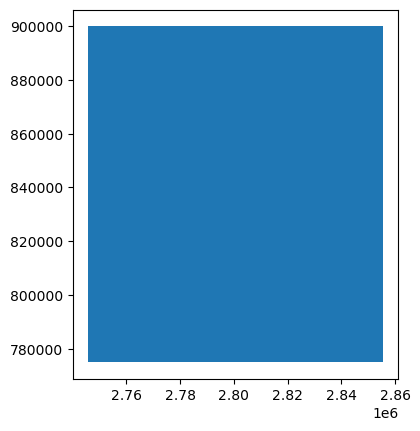

In [ ]:
descarga_poligonos_ciudades()
zmvm = gpd.read_file("../datos/descargas/silhuetas.shp.zip")
zmvm = zmvm.loc[zmvm.CVE_SUN == '13']
malla = Malla.desde_capa(zmvm, 1000)
malla.malla.plot()

Podemos ver la malla superpuesta al polígono que usamos para construirla:

<AxesSubplot:>

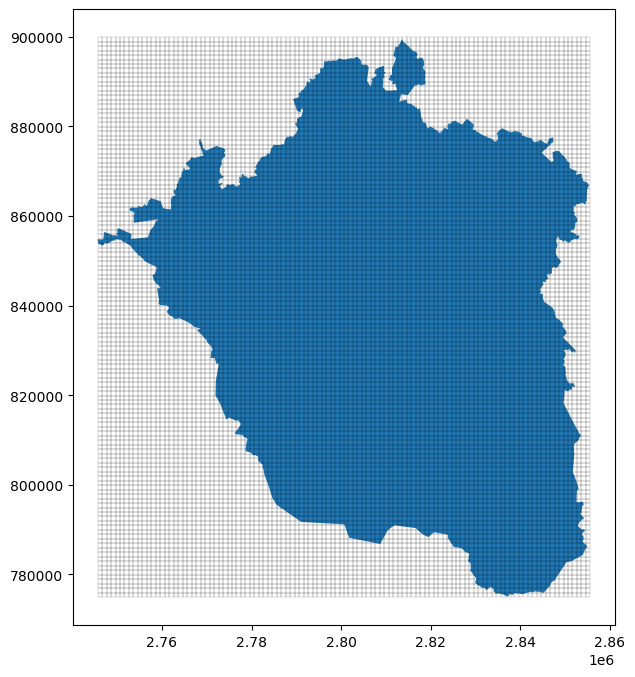

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
zmvm.plot(ax=ax)
malla.malla.boundary.plot(ax=ax, edgecolor="black", linewidth=0.1)

## Malla.agrega_puntos

Ahora vamos a agregar la funcionalidad para agregar una capa de puntos en la Malla.

**Nota:** el decorador `@patch` de `fastcore.basics` nos permite fácilmente agregar funcionalidad a una clase ya definida.

In [2]:
#|output: asis
#| echo: false
show_doc(Malla.agrega_puntos)

---

[source](https://github.com/CentroGeo/pyLandUseMX/blob/master/pyLandUseMX/mallas.py#L48){target="_blank" style="float:right; font-size:smaller"}

### Malla.agrega_puntos

>      Malla.agrega_puntos (puntos:geopandas.geodataframe.GeoDataFrame,
>                           campo:str='cuenta', clasificacion:str=None)

Regresa una `Malla` con los conteos de puntos en cada elemento.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| puntos | GeoDataFrame |  | La malla en la que se va a agregar |
| campo | str | cuenta | Nombre del campo en el que se guarda el resultado |
| clasificacion | str | None | Columna de `puntos` que clasifica a las observaciones. En este caso se agregan |
| **Returns** | **Malla** |  | **tantas columnas a la malla como valores distintos haya en la columna<br>(en este caso se ignora `campo`)** |

La forma más sencilla de usar este método es simplemente agregar _todos_ los puntos de una capa en la [`Malla`](https://CentroGeo.github.io/pyLandUseMX/mallas.html#malla).

In [ ]:
puntos = gpd.read_file("../datos/points_sample.zip")
agregado = malla.agrega_puntos(puntos, campo="puntos")
agregado.malla

,grid_id,puntos,geometry
0,0,0.0,"POLYGON ((2745631.810 774927.105, 2746631.810 ..."
1,1,0.0,"POLYGON ((2745631.810 775927.105, 2746631.810 ..."
2,2,0.0,"POLYGON ((2745631.810 776927.105, 2746631.810 ..."
3,3,0.0,"POLYGON ((2745631.810 777927.105, 2746631.810 ..."
4,4,0.0,"POLYGON ((2745631.810 778927.105, 2746631.810 ..."
...,...,...,...
13745,13745,0.0,"POLYGON ((2854631.810 894927.105, 2855631.810 ..."
13746,13746,0.0,"POLYGON ((2854631.810 895927.105, 2855631.810 ..."
13747,13747,0.0,"POLYGON ((2854631.810 896927.105, 2855631.810 ..."
13748,13748,0.0,"POLYGON ((2854631.810 897927.105, 2855631.810 ..."


La función regresa una copia del objeto original con el nuevo campo, el objeto original no se modifica:

In [ ]:
malla.malla

,grid_id,geometry
0,0,"POLYGON ((2745631.810 774927.105, 2746631.810 ..."
1,1,"POLYGON ((2745631.810 775927.105, 2746631.810 ..."
2,2,"POLYGON ((2745631.810 776927.105, 2746631.810 ..."
3,3,"POLYGON ((2745631.810 777927.105, 2746631.810 ..."
4,4,"POLYGON ((2745631.810 778927.105, 2746631.810 ..."
...,...,...
13745,13745,"POLYGON ((2854631.810 894927.105, 2855631.810 ..."
13746,13746,"POLYGON ((2854631.810 895927.105, 2855631.810 ..."
13747,13747,"POLYGON ((2854631.810 896927.105, 2855631.810 ..."
13748,13748,"POLYGON ((2854631.810 897927.105, 2855631.810 ..."


Podemos hacer un mapa de estos puntos agregados en la malla:

<AxesSubplot:>

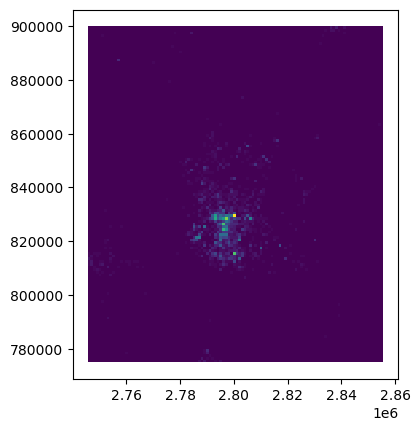

In [ ]:
agregado.malla.plot('puntos')

También es posible agregar los puntos de acuerdo a una clasificación previa. Por ejemplo, supongamos que tenemos datos del DENUE clasificados en tipos de usos de suelo como en el módulo `denue`.  

In [ ]:
descarga_denue('ejemplo')
denue = Denue.desde_archivo("../datos/descargas/ejemplo_denue.gpkg")
categorias = {
    'Manufacturas': ['^31.*5$', '^32.*5$', '^33.*5$'],
    'Oficinas': ['^51', '^521', '^523', '^524', '^5312', '^5313', '^541', '^55'],
    'Comercio': ['^46[123456]']
}
usos = denue.agrega_en_usos(categorias)
usos.datos.loc[~usos.datos.Categoria.isnull()][['nom_estab', 'codigo_act', 'Categoria']].head()

El archivo ya está descargado


,nom_estab,codigo_act,Categoria
1,TIENDA NATURISTA EL ARTE DE LA NATURALEZA,464113,Comercio
3,SIN NOMBRE,461130,Comercio
4,ADMINISTRACION MERCADO CONCENTRACION VOCEADORES,531311,Oficinas
6,ABARROTES LA TIA,461110,Comercio
7,BIZUTERIA SIN NOMBRE,463215,Comercio


Entonces podemos usar la columna `Categoria` para agregar los puntos en nuestra malla. La sintaxis es casi igual, sólo que en este caso pasamos el nombre de la columna con la que clasificamos las observaciones: 

In [ ]:
agregado = malla.agrega_puntos(usos.datos, clasificacion='Categoria')
agregado.malla

,grid_id,Comercio,Manufacturas,Oficinas,geometry
0,0,0.0,0.0,0.0,"POLYGON ((2745631.810 774927.105, 2746631.810 ..."
1,1,0.0,0.0,0.0,"POLYGON ((2745631.810 775927.105, 2746631.810 ..."
2,2,0.0,0.0,0.0,"POLYGON ((2745631.810 776927.105, 2746631.810 ..."
3,3,0.0,0.0,0.0,"POLYGON ((2745631.810 777927.105, 2746631.810 ..."
4,4,0.0,0.0,0.0,"POLYGON ((2745631.810 778927.105, 2746631.810 ..."
...,...,...,...,...,...
13745,13745,0.0,0.0,0.0,"POLYGON ((2854631.810 894927.105, 2855631.810 ..."
13746,13746,0.0,0.0,0.0,"POLYGON ((2854631.810 895927.105, 2855631.810 ..."
13747,13747,0.0,0.0,0.0,"POLYGON ((2854631.810 896927.105, 2855631.810 ..."
13748,13748,0.0,0.0,0.0,"POLYGON ((2854631.810 897927.105, 2855631.810 ..."


## Malla.grega_lineas

Ahora vamos a añadir la funcionalidad de agregar líneas en la malla. Lo que vamos a hacer es calcular la longitud de las líneas adentro de cada cuadrado de la retícula y utiliza ese valor en la malla. Sirve, por ejemplo, para calcular la longitud total de un tipo de vialidad en cada elemento de la malla.

In [3]:
#|output: asis
#| echo: false
show_doc(Malla.agrega_lineas)

---

[source](https://github.com/CentroGeo/pyLandUseMX/blob/master/pyLandUseMX/mallas.py#L84){target="_blank" style="float:right; font-size:smaller"}

### Malla.agrega_lineas

>      Malla.agrega_lineas (lineas:geopandas.geodataframe.GeoDataFrame,
>                           campo:str='longitud')

Regresa una `Malla` con la longitud de las lineas agregadas en cada elemento.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| lineas | GeoDataFrame |  | La capa de líneas a agregar |
| campo | str | longitud | Nombre del campo en el que se guarda el resultado |
| **Returns** | **Malla** |  |  |

Para probar la función, descargamos la red de OSM y filtramos sólo las vialidades primarias 

El archivo ya está descargado


<AxesSubplot:>

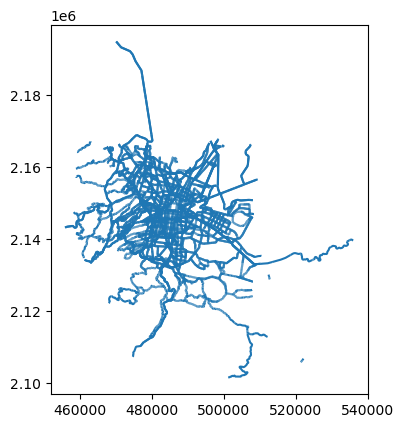

In [ ]:
descarga_redes() # nos aseguramos de tener la red
red = gpd.read_file("../datos/descargas/red_zmvm.gpkg")
red = red.loc[red.tag_id.isin([104,108,106,101])]
red.plot()

Con esta capa podemos probar la función

In [ ]:
red_malla = malla.agrega_lineas(red, campo='metros_vialidad')
red_malla.malla

,grid_id,geometry,metros_vialidad
0,0,"POLYGON ((2745631.810 774927.105, 2746631.810 ...",0.0
1,1,"POLYGON ((2745631.810 775927.105, 2746631.810 ...",0.0
2,2,"POLYGON ((2745631.810 776927.105, 2746631.810 ...",0.0
3,3,"POLYGON ((2745631.810 777927.105, 2746631.810 ...",0.0
4,4,"POLYGON ((2745631.810 778927.105, 2746631.810 ...",0.0
...,...,...,...
13745,13745,"POLYGON ((2854631.810 894927.105, 2855631.810 ...",0.0
13746,13746,"POLYGON ((2854631.810 895927.105, 2855631.810 ...",0.0
13747,13747,"POLYGON ((2854631.810 896927.105, 2855631.810 ...",0.0
13748,13748,"POLYGON ((2854631.810 897927.105, 2855631.810 ...",0.0


La [`Malla`](https://CentroGeo.github.io/pyLandUseMX/mallas.html#malla) que nos regresa sólo tiene el id de la malla y la longitud de la red dentro de cada elemento de la retícula. Lo podemos ver rápidamente en un mapa

<AxesSubplot:>

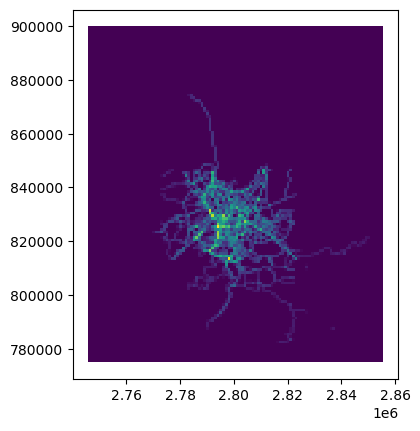

In [ ]:
red_malla.malla.plot('metros_vialidad')

Como cada operación regresa una copia del objeto, podemos _encadenar_ los métodos para ir agregando varias capas en una malla:

In [ ]:
malla_todo = (malla
             .agrega_puntos(puntos, campo="puntos")
             .agrega_lineas(red, campo='metros_vialidad')
             )
malla_todo.malla

,grid_id,puntos,geometry,metros_vialidad
0,0,0.0,"POLYGON ((2745631.810 774927.105, 2746631.810 ...",0.0
1,1,0.0,"POLYGON ((2745631.810 775927.105, 2746631.810 ...",0.0
2,2,0.0,"POLYGON ((2745631.810 776927.105, 2746631.810 ...",0.0
3,3,0.0,"POLYGON ((2745631.810 777927.105, 2746631.810 ...",0.0
4,4,0.0,"POLYGON ((2745631.810 778927.105, 2746631.810 ...",0.0
...,...,...,...,...
13745,13745,0.0,"POLYGON ((2854631.810 894927.105, 2855631.810 ...",0.0
13746,13746,0.0,"POLYGON ((2854631.810 895927.105, 2855631.810 ...",0.0
13747,13747,0.0,"POLYGON ((2854631.810 896927.105, 2855631.810 ...",0.0
13748,13748,0.0,"POLYGON ((2854631.810 897927.105, 2855631.810 ...",0.0


## Malla.to_xarray

Hasta ahora tenemos una representación vectorial de la malla, lo que sirve muy bien para operaciones espaciales con otras capas, pero una representación más natural y que nos permite operar de formas diferentes es la representación _raster_. En lugar de transformarlas en matrices directamente, vamos a usar `xarray` para representar nuestra malla como un `Dataset` de rasters.

In [4]:
#|output: asis
#| echo: false
show_doc(Malla.to_xarray)

---

[source](https://github.com/CentroGeo/pyLandUseMX/blob/master/pyLandUseMX/mallas.py#L108){target="_blank" style="float:right; font-size:smaller"}

### Malla.to_xarray

>      Malla.to_xarray (campos:list=None)

Regresa un xarray con los `campos` seleccionados como variables.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| campos | list | None | Lista de campos a convertir, se convierten en bandas del raster |

La función sólo toma como entrada los campos que queremos transformar a raster y regresa un `xarray` con las variables que seleccionamos como `Data variables`, las coordenadas `x` y `y` como `Coordinates` y en la proyección de la malla que le pasemos. 

In [ ]:
cube = malla_todo.to_xarray()
cube

<xarray.Dataset>
Dimensions:          (y: 126, x: 111)
Coordinates:
  * y                (y) float64 7.745e+05 7.755e+05 ... 8.985e+05 8.995e+05
  * x                (x) float64 2.856e+06 2.854e+06 ... 2.746e+06 2.746e+06
    spatial_ref      int64 0
Data variables:
    puntos           (y, x) float64 nan nan nan nan nan ... 0.0 0.0 0.0 0.0 nan
    metros_vialidad  (y, x) float64 nan nan nan nan nan ... 0.0 0.0 0.0 0.0 nan

Podemos ver el raster correspondiente a cualquiera de las variables

<matplotlib.collections.QuadMesh>

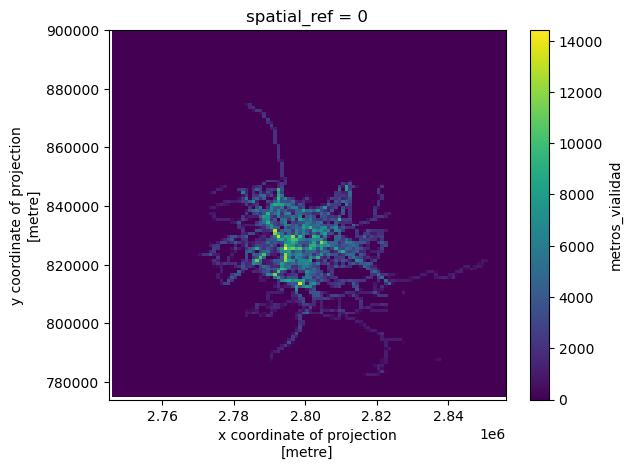

In [ ]:
cube.metros_vialidad.plot()